# Flipkart E-commerce Data of various products


# This project is made by a team of Batch 3
    Kaushik Ghosh
    
    Mukund Agarwal
    
    Salini Mukherjee
   
    Rajdeep Koner


# Context
This is a pre-crawled dataset, taken as subset of a bigger dataset (more than 5.8 million products) that was created by extracting data from Flipkart.com, a leading Indian eCommerce store.

# Content
This dataset has following fields:
product_url product_name product_category_tree pid retail_price discounted_price image is_FK_Advantage_product description product_rating overall_rating brand product_specifications

# Acknowledgements
This dataset was created by PromptCloud's in-house web-crawling service.

# Inspiration
Analyses of the pricing, product specification and brand can be performed.

In [1]:
# Import Statement

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

import os
os.environ['PATH'] += os.pathsep +'C:\Program Files (x86)/Graphviz2.38/bin/'
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# Load the Dataset

df=pd.read_csv('flipkart_final_cleared.csv')
df.head()

Unnamed: 0                           product_name  \
0           0    Alisha Solid Women's Cycling Shorts   
1           1    FabHomeDecor Fabric Double Sofa Bed   
2           2                             AW Bellies   
3           3    Alisha Solid Women's Cycling Shorts   
4           4  Sicons All Purpose Arnica Dog Shampoo   

                               product_category_tree  retail_price  \
0  ["Clothing >> Women's Clothing >> Lingerie, Sl...         999.0   
1  ["Furniture >> Living Room Furniture >> Sofa B...       32157.0   
2  ["Footwear >> Women's Footwear >> Ballerinas >...         999.0   
3  ["Clothing >> Women's Clothing >> Lingerie, Sl...         699.0   
4  ["Pet Supplies >> Grooming >> Skin & Coat Care...         220.0   

   discounted_price  is_FK_Advantage_product  product_rating  overall_rating  \
0             379.0                    False             5.0             3.0   
1           22646.0                    False             2.0             5.0   
2             499.0                    False             4.0             3.0   
3             267.0                    False             2.0             4.0   
4             210.0                    False             1.0             3.0   

    Brand_names product_category  \
0        Alisha        Clothing    
1  FabHomeDecor       Furniture    
2            AW        Footwear    
3        Alisha        Clothing    
4        Sicons    Pet Supplies    

                               product_specs_refined  
0  {"product_specification"=>[{"key"=>"Number of ...  
1  {"product_specification"=>[{"key"=>"Installati...  
2  {"product_specification"=>[{"key"=>"Ideal For"...  
3  {"product_specification"=>[{"key"=>"Number of ...  
4  {"product_specification"=>[{"key"=>"Pet Type",...

In [3]:
# Information of the Datset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19441 entries, 0 to 19440
Data columns (total 11 columns):
Unnamed: 0                 19441 non-null int64
product_name               19441 non-null object
product_category_tree      19441 non-null object
retail_price               19441 non-null float64
discounted_price           19441 non-null float64
is_FK_Advantage_product    19441 non-null bool
product_rating             19441 non-null float64
overall_rating             19441 non-null float64
Brand_names                19441 non-null object
product_category           19441 non-null object
product_specs_refined      19441 non-null object
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 1.5+ MB


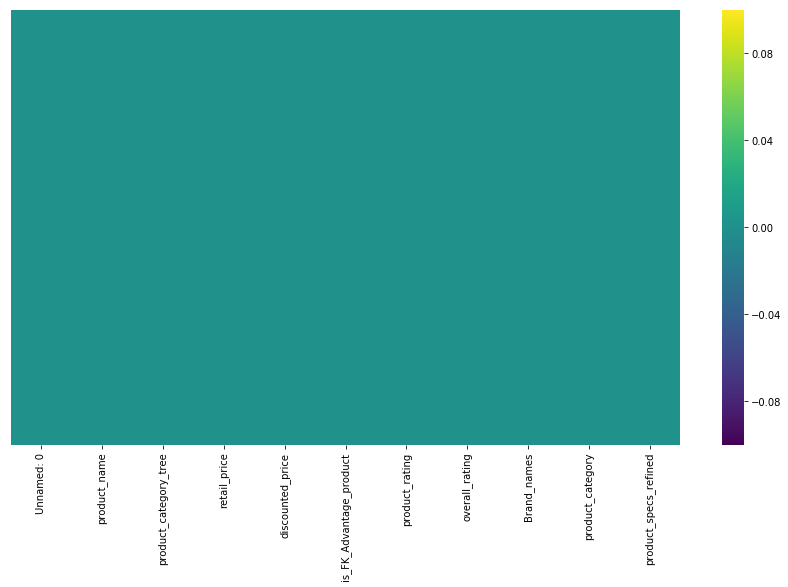

In [4]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [5]:
fk = pd.get_dummies(df["is_FK_Advantage_product"],drop_first = True)
df['is_FK_Advantage_product'] = fk
df.head()

Unnamed: 0                           product_name  \
0           0    Alisha Solid Women's Cycling Shorts   
1           1    FabHomeDecor Fabric Double Sofa Bed   
2           2                             AW Bellies   
3           3    Alisha Solid Women's Cycling Shorts   
4           4  Sicons All Purpose Arnica Dog Shampoo   

                               product_category_tree  retail_price  \
0  ["Clothing >> Women's Clothing >> Lingerie, Sl...         999.0   
1  ["Furniture >> Living Room Furniture >> Sofa B...       32157.0   
2  ["Footwear >> Women's Footwear >> Ballerinas >...         999.0   
3  ["Clothing >> Women's Clothing >> Lingerie, Sl...         699.0   
4  ["Pet Supplies >> Grooming >> Skin & Coat Care...         220.0   

   discounted_price  is_FK_Advantage_product  product_rating  overall_rating  \
0             379.0                        0             5.0             3.0   
1           22646.0                        0             2.0             5.0   
2             499.0                        0             4.0             3.0   
3             267.0                        0             2.0             4.0   
4             210.0                        0             1.0             3.0   

    Brand_names product_category  \
0        Alisha        Clothing    
1  FabHomeDecor       Furniture    
2            AW        Footwear    
3        Alisha        Clothing    
4        Sicons    Pet Supplies    

                               product_specs_refined  
0  {"product_specification"=>[{"key"=>"Number of ...  
1  {"product_specification"=>[{"key"=>"Installati...  
2  {"product_specification"=>[{"key"=>"Ideal For"...  
3  {"product_specification"=>[{"key"=>"Number of ...  
4  {"product_specification"=>[{"key"=>"Pet Type",...

In [6]:
df['product_rating'] = df['product_rating'].replace("No rating available",np.nan)
df['overall_rating'] = df['overall_rating'].replace("No rating available",np.nan)

In [7]:
pr=round(df.product_rating.isnull().sum()*100/df.shape[0], 2)
pr

0.0

In [8]:
orr=round(df.overall_rating.isnull().sum()*100/df.shape[0], 2)
orr

0.0

In [9]:
df['product_rating'] = pr
df['overall_rating'] = orr
df.head(10)

Unnamed: 0                                       product_name  \
0           0                Alisha Solid Women's Cycling Shorts   
1           1                FabHomeDecor Fabric Double Sofa Bed   
2           2                                         AW Bellies   
3           3                Alisha Solid Women's Cycling Shorts   
4           4              Sicons All Purpose Arnica Dog Shampoo   
5           5  Eternal Gandhi Super Series Crystal Paper Weig...   
6           6                Alisha Solid Women's Cycling Shorts   
7           7                FabHomeDecor Fabric Double Sofa Bed   
8           8  dilli bazaaar Bellies, Corporate Casuals, Casuals   
9           9                Alisha Solid Women's Cycling Shorts   

                               product_category_tree  retail_price  \
0  ["Clothing >> Women's Clothing >> Lingerie, Sl...         999.0   
1  ["Furniture >> Living Room Furniture >> Sofa B...       32157.0   
2  ["Footwear >> Women's Footwear >> Ballerinas >...         999.0   
3  ["Clothing >> Women's Clothing >> Lingerie, Sl...         699.0   
4  ["Pet Supplies >> Grooming >> Skin & Coat Care...         220.0   
5  ["Eternal Gandhi Super Series Crystal Paper We...         430.0   
6  ["Clothing >> Women's Clothing >> Lingerie, Sl...        1199.0   
7  ["Furniture >> Living Room Furniture >> Sofa B...       32157.0   
8  ["Footwear >> Women's Footwear >> Ballerinas >...         699.0   
9  ["Clothing >> Women's Clothing >> Lingerie, Sl...        1199.0   

   discounted_price  is_FK_Advantage_product  product_rating  overall_rating  \
0             379.0                        0             0.0             0.0   
1           22646.0                        0             0.0             0.0   
2             499.0                        0             0.0             0.0   
3             267.0                        0             0.0             0.0   
4             210.0                        0             0.0             0.0   
5             430.0                        0             0.0             0.0   
6             479.0                        0             0.0             0.0   
7           22646.0                        0             0.0             0.0   
8             349.0                        0             0.0             0.0   
9             479.0                        0             0.0             0.0   

      Brand_names                                   product_category  \
0          Alisha                                          Clothing    
1    FabHomeDecor                                         Furniture    
2              AW                                          Footwear    
3          Alisha                                          Clothing    
4          Sicons                                      Pet Supplies    
5  Eternal Gandhi  Eternal Gandhi Super Series Crystal Paper Weig...   
6          Alisha                                          Clothing    
7    FabHomeDecor                                         Furniture    
8   dilli bazaaar                                          Footwear    
9          Alisha                                          Clothing    

                               product_specs_refined  
0  {"product_specification"=>[{"key"=>"Number of ...  
1  {"product_specification"=>[{"key"=>"Installati...  
2  {"product_specification"=>[{"key"=>"Ideal For"...  
3  {"product_specification"=>[{"key"=>"Number of ...  
4  {"product_specification"=>[{"key"=>"Pet Type",...  
5  {"product_specification"=>[{"key"=>"Model Name...  
6  {"product_specification"=>[{"key"=>"Number of ...  
7  {"product_specification"=>[{"key"=>"Installati...  
8  {"product_specification"=>[{"key"=>"Occasion",...  
9  {"product_specification"=>[{"key"=>"Number of ...

In [10]:
# Finding the Discount Percentage
df["discount_percent"] = ((df.retail_price - df.discounted_price)*100)/df.retail_price
df.head()

Unnamed: 0                           product_name  \
0           0    Alisha Solid Women's Cycling Shorts   
1           1    FabHomeDecor Fabric Double Sofa Bed   
2           2                             AW Bellies   
3           3    Alisha Solid Women's Cycling Shorts   
4           4  Sicons All Purpose Arnica Dog Shampoo   

                               product_category_tree  retail_price  \
0  ["Clothing >> Women's Clothing >> Lingerie, Sl...         999.0   
1  ["Furniture >> Living Room Furniture >> Sofa B...       32157.0   
2  ["Footwear >> Women's Footwear >> Ballerinas >...         999.0   
3  ["Clothing >> Women's Clothing >> Lingerie, Sl...         699.0   
4  ["Pet Supplies >> Grooming >> Skin & Coat Care...         220.0   

   discounted_price  is_FK_Advantage_product  product_rating  overall_rating  \
0             379.0                        0             0.0             0.0   
1           22646.0                        0             0.0             0.0   
2             499.0                        0             0.0             0.0   
3             267.0                        0             0.0             0.0   
4             210.0                        0             0.0             0.0   

    Brand_names product_category  \
0        Alisha        Clothing    
1  FabHomeDecor       Furniture    
2            AW        Footwear    
3        Alisha        Clothing    
4        Sicons    Pet Supplies    

                               product_specs_refined  discount_percent  
0  {"product_specification"=>[{"key"=>"Number of ...         62.062062  
1  {"product_specification"=>[{"key"=>"Installati...         29.576764  
2  {"product_specification"=>[{"key"=>"Ideal For"...         50.050050  
3  {"product_specification"=>[{"key"=>"Number of ...         61.802575  
4  {"product_specification"=>[{"key"=>"Pet Type",...          4.545455

# Top Brands


In [11]:
top_Brands=df.groupby(['product_category','Brand_names'],as_index=False).agg({'discount_percent':np.mean})
top_Brands=np.round(top_Brands,2)
top_Brands=top_Brands.reindex()
top_Brands=top_Brands.sort_values(by='discount_percent',ascending=False)
top_Brands

product_category          Brand_names  \
3552                                  Home Furnishing             Rajcrafts   
4507                            Mobiles & Accessories                 Bling   
2326                                        Computers              Instella   
4510                            Mobiles & Accessories            Bond Beatz   
258                                         Baby Care               Poppins   
1364                                         Clothing           KazamaKraft   
2352                                        Computers       Mydress Mystyle   
1367                                         Clothing                   Kea   
2982                                           Gaming                   SDZ   
4517                            Mobiles & Accessories                  CUBA   
354                             Bags, Wallets & Belts             Elligator   
3962                                        Jewellery        Kaizer Jewelry   
3810                                        Jewellery            Fash Blush   
3811                                        Jewellery             FashBlush   
1004                                         Clothing            Dark Green   
4054                                        Jewellery                 Remix   
5003                                       Sunglasses              barbarik   
4554                            Mobiles & Accessories              Head Kik   
48                                         Automotive            Bracketron   
3813                                        Jewellery             Fashblush   
5303                                          Watches             JackKlein   
5388                                          Watches                palito   
4394                                 Kitchen & Dining       Rhythem Listers   
424                             Bags, Wallets & Belts             Shoprider   
1139                                         Clothing              FreeSoul   
887                                          Clothing             Black Bee   
842                                          Clothing         Autokartindia   
3388                       Home Decor & Festive Needs        narayan export   
3858                                        Jewellery               Gliteri   
5304                                          Watches             Jackklein   
...                                                ...                  ...   
1340                                         Clothing                KAVACi   
4147                                        Jewellery              Utkalika   
4160                                        Jewellery            Velvetcase   
4776                                Pens & Stationery               Probott   
4734                                Pens & Stationery               Filofax   
1493                                         Clothing            LoweAlpine   
4736                                Pens & Stationery             Freelance   
1569                                         Clothing           ModoVivendi   
1565                                         Clothing                Mizuno   
1561                                         Clothing             MissGrace   
4740                                Pens & Stationery      Hm International   
1553                                         Clothing        Mi Dulce An'ya   
1542                                         Clothing                 Megha   
4744                                Pens & Stationery             InstaNote   
1539                                         Clothing               Mee Mee   
1533                                         Clothing                   Max   
1529                                         Clothing     MasterweaverIndia   
4754                                Pens & Stationery                 Maped   
4756                                Pens & Stationery                   Max   
4757     

In [12]:
df[['product_name','Brand_names','retail_price','discounted_price','discount_percent']].head()

product_name   Brand_names  retail_price  \
0    Alisha Solid Women's Cycling Shorts        Alisha         999.0   
1    FabHomeDecor Fabric Double Sofa Bed  FabHomeDecor       32157.0   
2                             AW Bellies            AW         999.0   
3    Alisha Solid Women's Cycling Shorts        Alisha         699.0   
4  Sicons All Purpose Arnica Dog Shampoo        Sicons         220.0   

   discounted_price  discount_percent  
0             379.0         62.062062  
1           22646.0         29.576764  
2             499.0         50.050050  
3             267.0         61.802575  
4             210.0          4.545455

# Naive Bayes Algorithm

In [13]:
number = LabelEncoder()

df['Brand_names'] = number.fit_transform(df['Brand_names'])

df['product_category'] = number.fit_transform(df['product_category'])

df['is_FK_Advantage_product'] = number.fit_transform(df['is_FK_Advantage_product'])


In [14]:
features = ["Brand_names", "product_category"]
target = "is_FK_Advantage_product"


In [15]:
features_train, features_test, target_train, target_test = train_test_split(df[features],df[target],test_size = 0.33,random_state = 101)


In [16]:
model = GaussianNB()
model.fit(features_train, target_train)

GaussianNB(priors=None)

In [17]:
G_pred = model.predict(features_test)
accuracy = accuracy_score(target_test, G_pred)
print("Accuracy = ",accuracy)

Accuracy =  0.956359102244389


In [18]:
print (model.predict([[5,3]]))

[0]


# KNN Algorithm

In [19]:
knn=KNeighborsClassifier(n_neighbors=2)

In [20]:
knn.fit(features_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [21]:
knn_pred = knn.predict(features_test)
accuracy_knn = accuracy_score(target_test, knn_pred)
print("Accuracy = ",accuracy_knn)

Accuracy =  0.9655548628428927


In [22]:
print(confusion_matrix(target_test, knn_pred))

[[6112   27]
 [ 194   83]]


In [23]:
print(classification_report(target_test, knn_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      6139
          1       0.75      0.30      0.43       277

avg / total       0.96      0.97      0.96      6416



# Logistic Regression

In [24]:
logmodel = LogisticRegression()
logmodel.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
log_pred = logmodel.predict(features_test)
accuracy_log = accuracy_score(target_test, log_pred)
print("Accuracy = ",accuracy_log)

Accuracy =  0.9568266832917706


In [26]:
print(confusion_matrix(target_test, log_pred))

[[6139    0]
 [ 277    0]]


In [27]:
print(classification_report(target_test, log_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      6139
          1       0.00      0.00      0.00       277

avg / total       0.92      0.96      0.94      6416



C:\Users\koner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Perceptron


In [28]:
sc = StandardScaler()
sc.fit(features_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
features_train_std = sc.transform(features_train)
features_test_std = sc.transform(features_test)

In [30]:
ppn = Perceptron(n_iter = 40,eta0 = 0.1, random_state=101)

In [31]:
ppn.fit(features_train, target_train)

C:\Users\koner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=101,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [32]:
P_pred = ppn.predict(features_test_std)

In [33]:
P_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
target_test

18779    1
12074    0
6986     0
15079    0
16432    0
11603    0
10720    0
495      0
370      0
564      0
215      0
13634    0
14810    0
5223     0
6361     0
8847     0
19057    0
10552    0
16448    0
10115    0
18316    0
269      0
16660    0
16349    0
13617    0
14261    0
7736     0
4158     0
2244     0
17444    0
        ..
10922    0
989      0
4201     0
8718     0
5163     0
8810     0
15427    0
5900     0
18627    0
18348    1
8012     0
119      0
14469    0
9800     0
18849    1
5151     0
16817    0
7691     0
17063    0
14438    0
7265     0
17462    0
11433    0
18229    0
17935    0
8277     0
1910     0
15622    0
18175    0
2486     0
Name: is_FK_Advantage_product, Length: 6416, dtype: int64

Examine Accuracy Metric

In [35]:
print('Accuracy: %2f' %accuracy_score(target_test,P_pred))

Accuracy: 0.956827


# Decision Tree

In [36]:
dtree=DecisionTreeClassifier()

In [37]:
dtree.fit(features_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
dot_data=StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [39]:
probability_dtree = dtree.predict_proba(features_test)

print (probability_dtree)

[[0.26666667 0.73333333]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [0.87096774 0.12903226]
 [1.         0.        ]]


In [40]:
dtree_pred=dtree.predict(features_test)

In [41]:
print(confusion_matrix(target_test,dtree_pred))

[[6059   80]
 [ 159  118]]


In [42]:
print(classification_report(target_test,dtree_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98      6139
          1       0.60      0.43      0.50       277

avg / total       0.96      0.96      0.96      6416



In [43]:
accuracy_score(target_test,dtree_pred)

0.9627493765586035

# Random Forest

In [44]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
rfc_pred=rfc.predict(features_test)

In [46]:
print(confusion_matrix(target_test,rfc_pred))

[[6079   60]
 [ 159  118]]


In [47]:
accuracy_score(target_test, rfc_pred)

0.9658665835411472

In [48]:
probability_rfc = rfc.predict_proba(features_test)

print (probability_rfc)

[[0.27193545 0.72806455]
 [1.         0.        ]
 [0.99571429 0.00428571]
 ...
 [1.         0.        ]
 [0.87293956 0.12706044]
 [1.         0.        ]]


In [49]:
print(classification_report(target_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98      6139
          1       0.66      0.43      0.52       277

avg / total       0.96      0.97      0.96      6416



## We will go with the Random Forest model to predict the values since it has the highest accuracy 96.58%